In [1]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.7.3
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.17.1
import numpy as np

# pandas  0.25.1
import pandas as pd

# scikit-learn  0.21.3
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# matplotlib  3.1.1
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
from lab04lib import *

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'mushroom/agaricus-lepiota.data', header=None, engine='python')
column_name = ['classes','cap-shape', 'cap-surface','cap-color','bruises?','odor',
               'gill-attachment','gill-spacing','gill-size','gill-color',
               'stalk-shape','stalk-root','stalk-surface-above-ring',
               'stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number',
               'ring-type','spore-print-color','population','habitat']
df.columns = column_name
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# encode label first
label_le = LabelEncoder()
df['classes'] = label_le.fit_transform(df['classes'].values)

# encode categorical features
catego_features = ['cap-shape', 'cap-surface','cap-color','bruises?','odor',
               'gill-attachment','gill-spacing','gill-size','gill-color',
               'stalk-shape','stalk-root','stalk-surface-above-ring',
               'stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number',
               'ring-type','spore-print-color','population','habitat']

catego_le = LabelEncoder()

# transform categorical values into numerical values
# be careful that '?' will also be encoded
# we have to replace it to NaN in numerical
categories = []
for i in catego_features:
    df[i] = catego_le.fit_transform(df[i].values)
    classes_list = catego_le.classes_.tolist()
    
    # replace '?' with 'NaN'
    if '?' in classes_list:
        idx = classes_list.index('?')
        df[i] = df[i].replace(idx, np.nan)
    
    # store the total number of values
    categories.append(np.arange(len(classes_list)))

display(df.head(15))


,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [4]:
# count the number of missing values per column
display(df.isnull().sum())

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [5]:
imr = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

# display(df.head(15))
# display(df_impute.head(15))

# check if there are still missing values
display(df_impute.isnull().sum())

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
print(df_impute.shape)

# drop rows with missing values
df_drop_row = df_impute.dropna()
print(df_drop_row.shape)


# find the index of the categorical feature
catego_features_idx = []
for fea in catego_features:
    
    catego_features_idx.append(df_drop_row.columns.tolist().index(fea))


(8124, 23)
(8124, 23)


In [7]:
# df_small = df_drop_row.sample(n = 4000, random_state = 0)
df_small = df_drop_row
# display(df_small.head(15))
X = df_small.drop('classes', axis=1).values
# X = X[:,[4,8]]
y = df_small['classes'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

[ 4  7  8 19 18 20 11 10 12  6  3  9 21 13 14  2  1 17  0 16  5 15]
 1) odor                           0.172936
 2) gill-size                      0.113841
 3) gill-color                     0.109399
 4) spore-print-color              0.099748
 5) ring-type                      0.069250
 6) population                     0.055549
 7) stalk-surface-above-ring       0.048855
 8) stalk-root                     0.042477
 9) stalk-surface-below-ring       0.040824
10) gill-spacing                   0.040498
11) bruises?                       0.040025
12) stalk-shape                    0.032102
13) habitat                        0.030896
14) stalk-color-above-ring         0.028663
15) stalk-color-below-ring         0.021586
16) cap-color                      0.016383
17) cap-surface                    0.012817
18) ring-number                    0.012094
19) cap-shape                      0.006420
20) veil-color                     0.003997
21) gill-attachment                0.001639
22) veil

/home/hhliao/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


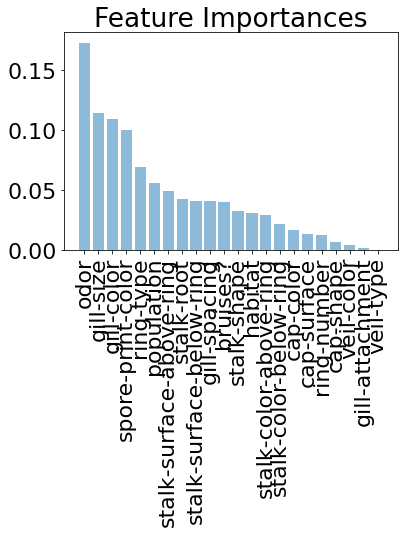

In [8]:
# features extraction
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
# print(indices)

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            df_small.drop('classes', axis=1).columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           df_small.drop('classes', axis=1).columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

In [9]:
# Best Model

# Select all features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


# define pipeline with an arbitrary number of transformer in a tuple array
pipe_knn = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("scl", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors = 10, p = 2, metric = "minkowski"))
])


# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 0
Accuracy: 1.0000


In [10]:
# Select top 2 features
X_select = X[:,indices[:2]]

X_train, X_test, y_train, y_test = train_test_split(
    X_select, y, test_size=0.2, random_state=0)


# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN-select top3 features]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
# print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))


[KNN-select top3 features]
Misclassified samples: 19


X[:, 0] (8124, 2)
x1,x2 -2.9887406418931954
x1,x2 2.83786101804948
x1,x2 -1.6734907578722518
x1,x2 2.4848013700428195
np.array([xx1.ravel(), xx2.ravel()]) (2, 60736)


/home/hhliao/DL/DeepLearning_NTHU/lab04lib.py:84: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  edgecolors = 'k'


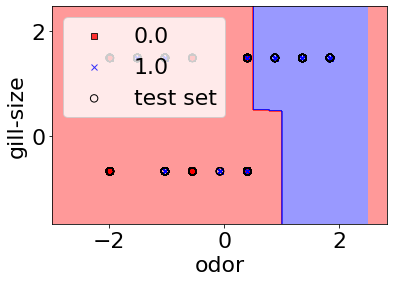

In [11]:
# plot decision regions for knn classifier
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=pipe_knn, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel(df_small.drop('classes', axis=1).columns.values[indices[0]])
plt.ylabel(df_small.drop('classes', axis=1).columns.values[indices[1]])
plt.legend(loc='upper left')
# plt.tight_layout()
plt.savefig('./output/fig-two-moon-knn-boundray.png', dpi=300)
plt.show()